# Importação base de dados e bibliotecas

In [1]:
! kaggle datasets download pavansubhasht/ibm-hr-analytics-attrition-dataset && ! unzip /content/ibm-hr-analytics-attrition-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/ibm-hr-analytics-attrition-dataset.zip
replace WA_Fn-UseC_-HR-Employee-Attrition.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entendendo os dados

In [3]:
funcionarios = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition (desgaste)

In [5]:
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
funcionarios.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Encontrar as tendêcias, Qual departamento é mais propício?

In [7]:
funcionarios['Attrition'] = funcionarios['Attrition'].map({'Yes': 1, 'No': 0})
funcionarios['OverTime'] = funcionarios['OverTime'].map({'Yes': 1, 'No': 0})

In [8]:
funcionarios.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# Vizualização dos dados

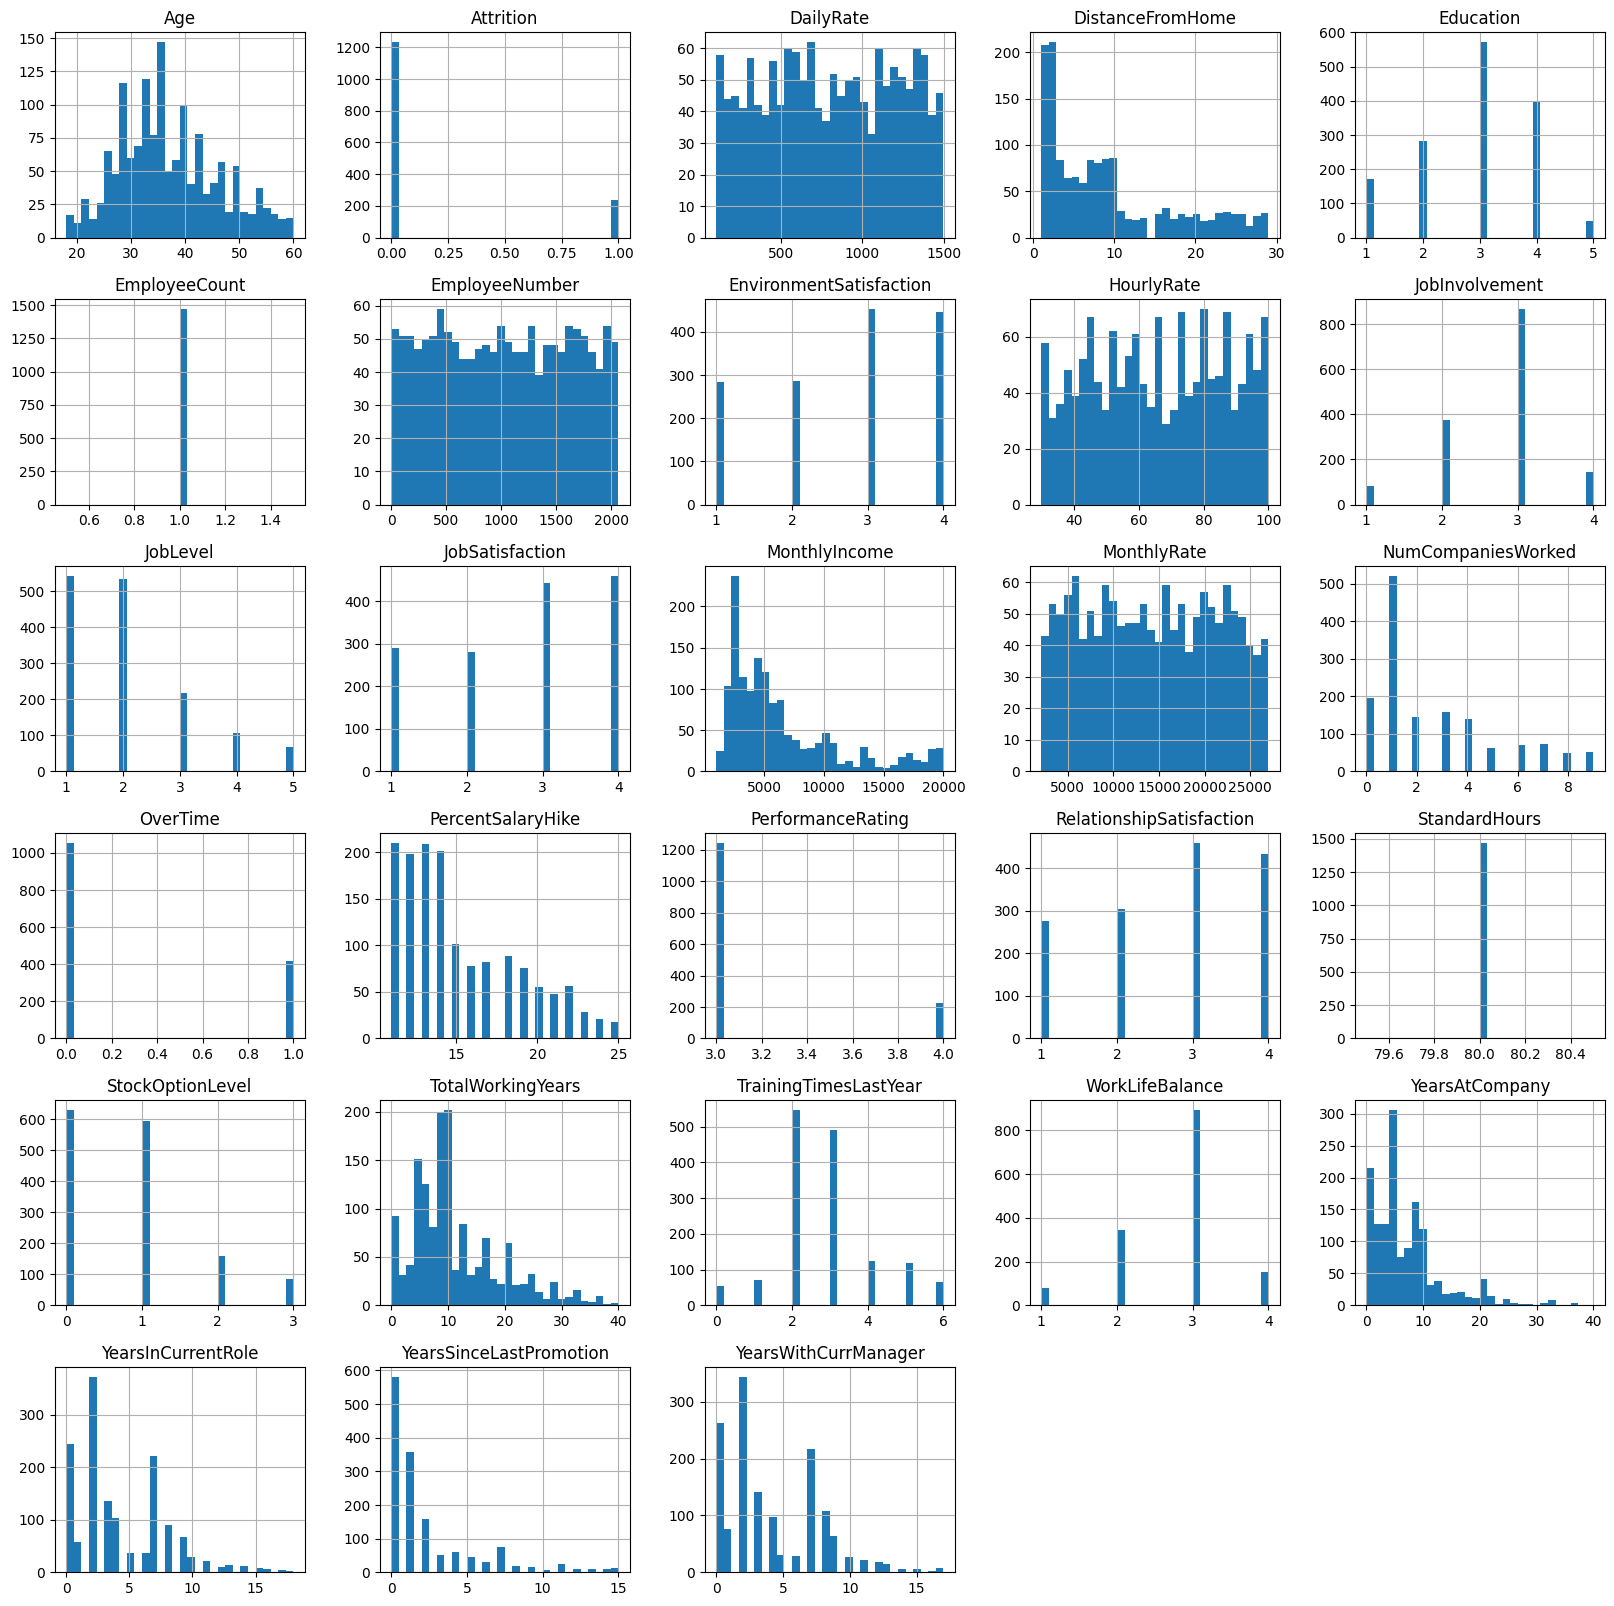

In [9]:
funcionarios.hist(bins = 30, figsize=(20, 20));

Podemos observar algumas colunas que podem ser descartadas

In [10]:
funcionarios.drop(['EmployeeCount','StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [11]:
sairam = funcionarios[funcionarios['Attrition'] == 1]
continuaram = funcionarios[funcionarios['Attrition'] == 0]
print(f'Funcionários que saíram: {sairam.shape[0]}')
print(f'Funcionários que continuaram: {continuaram.shape[0]}')
print(f'Porcentagem que saíram: {(sairam.shape[0] / funcionarios.shape[0]) * 100}')
print(f'Porcentagem que ficaram: {(continuaram.shape[0] / funcionarios.shape[0]) * 100}')

Funcionários que saíram: 237
Funcionários que continuaram: 1233
Porcentagem que saíram: 16.122448979591837
Porcentagem que ficaram: 83.87755102040816


In [12]:
sairam.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [13]:
continuaram.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


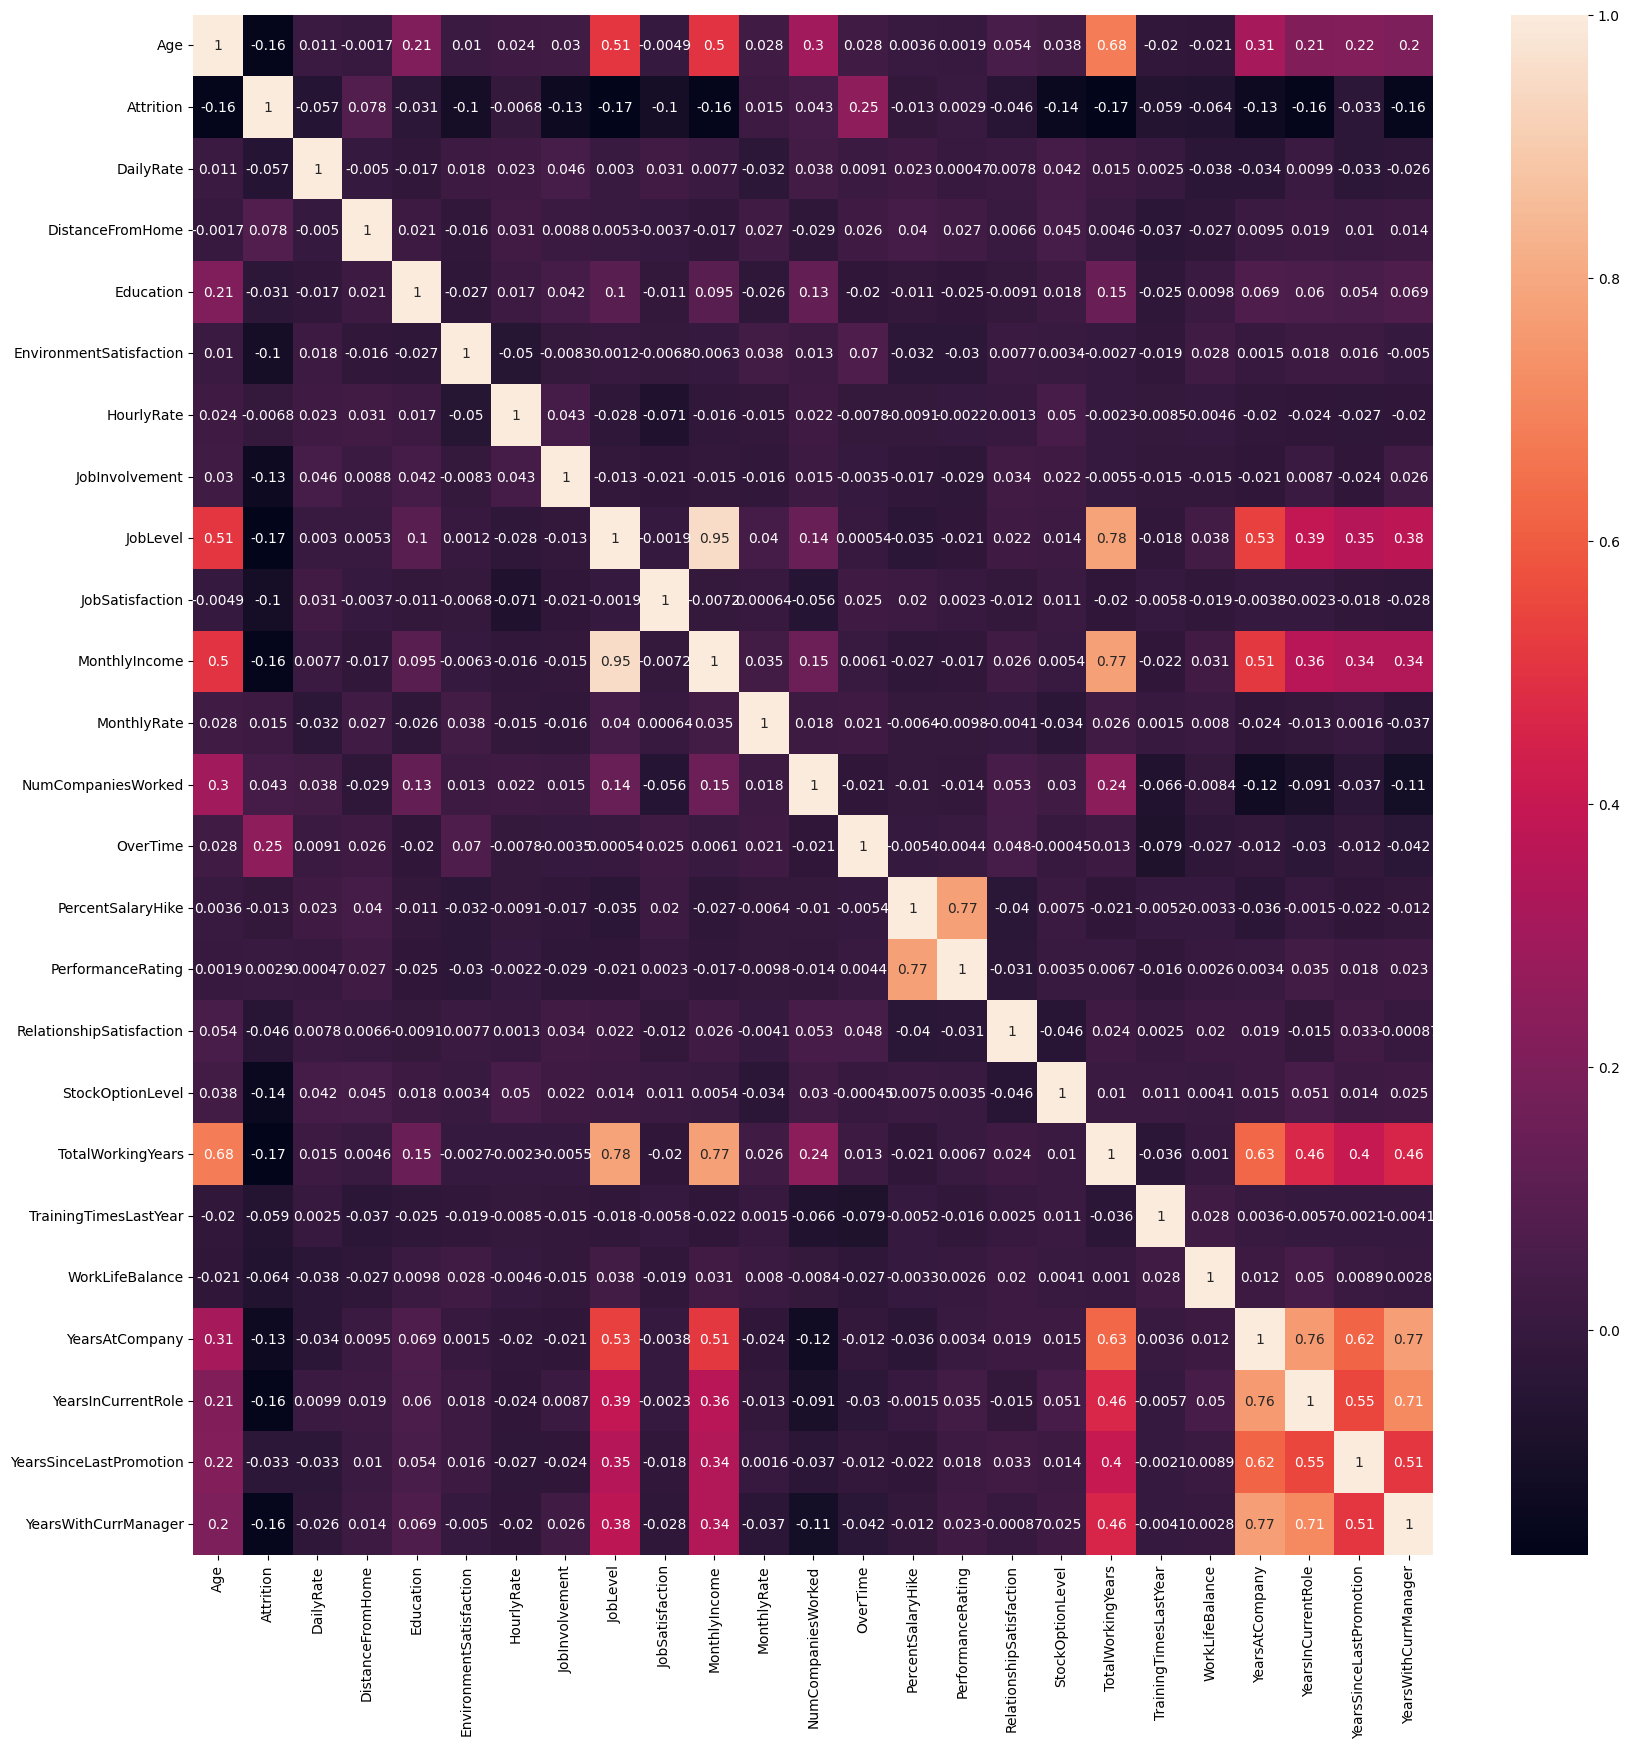

In [14]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(funcionarios.select_dtypes(include=np.number).corr(), annot=True);


Os principais fatores que parecem influenciar a rotatividade são:

- Idade mais jovem.

- Maior distância de casa até o trabalho.

- Horas extras frequentes

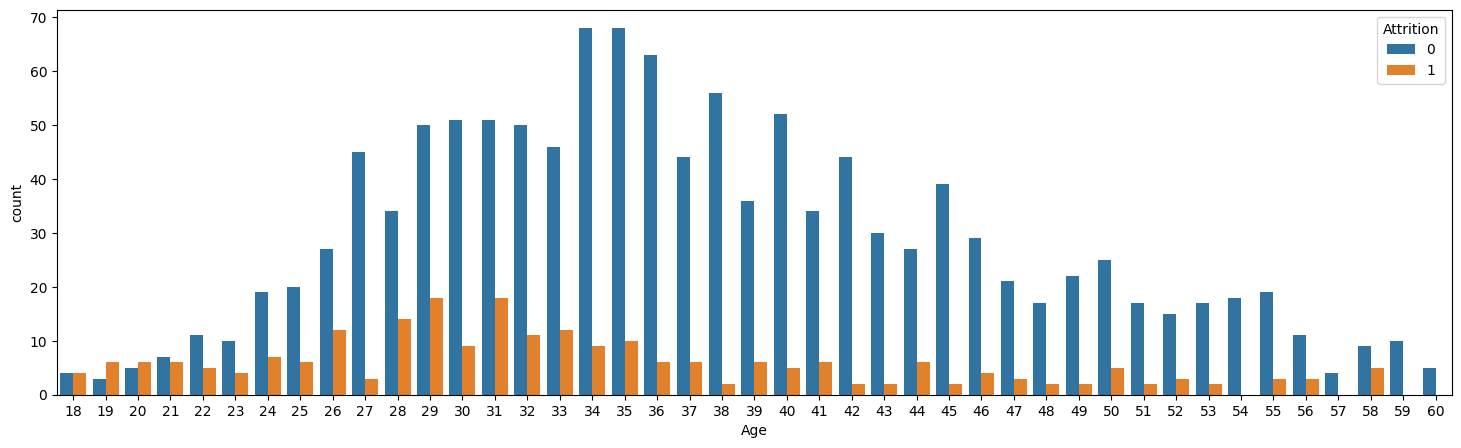

In [15]:
plt.figure(figsize=(18, 5))
sns.countplot(x = 'Age', hue = 'Attrition', data = funcionarios);

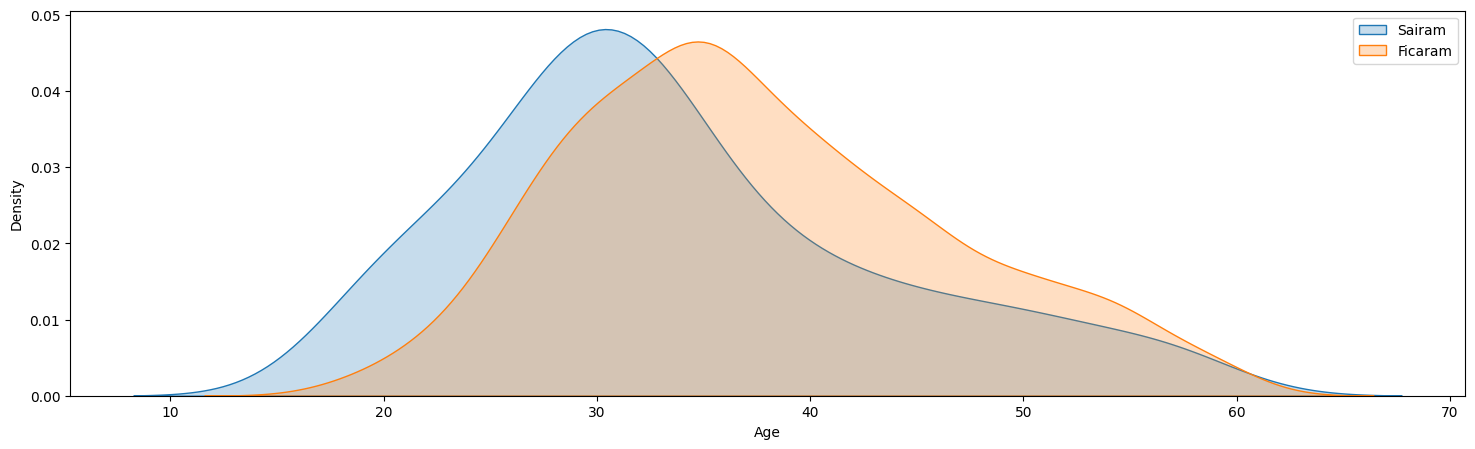

In [16]:
plt.figure(figsize=(18, 5))
sns.kdeplot(sairam['Age'], label = 'Sairam', fill = True);
sns.kdeplot(continuaram['Age'], label = 'Ficaram', fill = True);
plt.legend();

Dos 18 até 21, a proporção dos que saem da empresa é até maior em relação aos que ficam

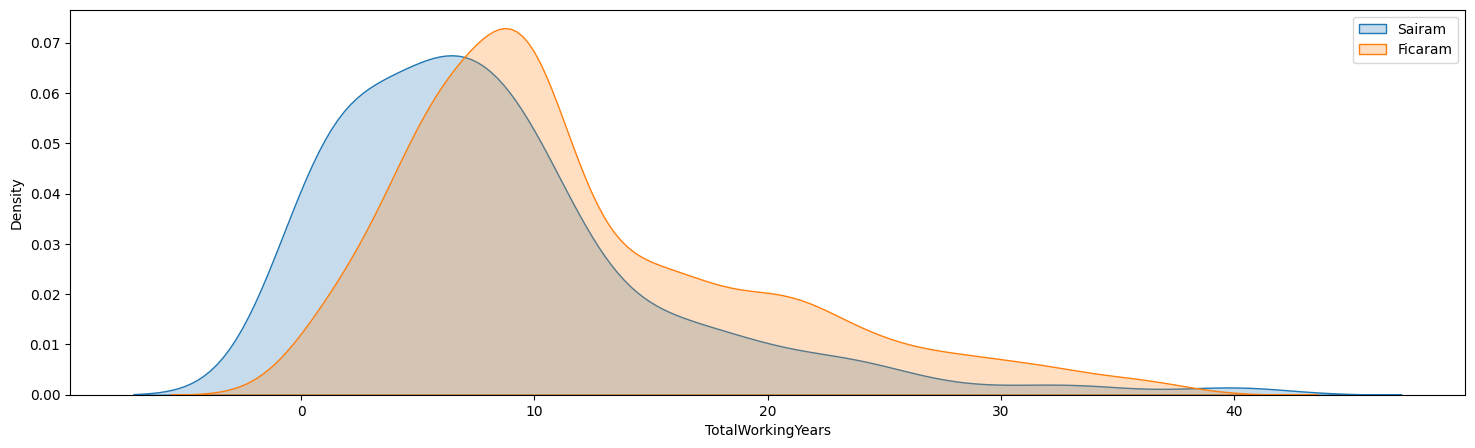

In [17]:
plt.figure(figsize=(18, 5))
sns.kdeplot(sairam['TotalWorkingYears'], label = 'Sairam', fill = True);
sns.kdeplot(continuaram['TotalWorkingYears'], label = 'Ficaram', fill = True);
plt.legend();

Pessoas que trabalharam menos a vida toda tendem a sair da empresa, confirmando o que já imaginávamos

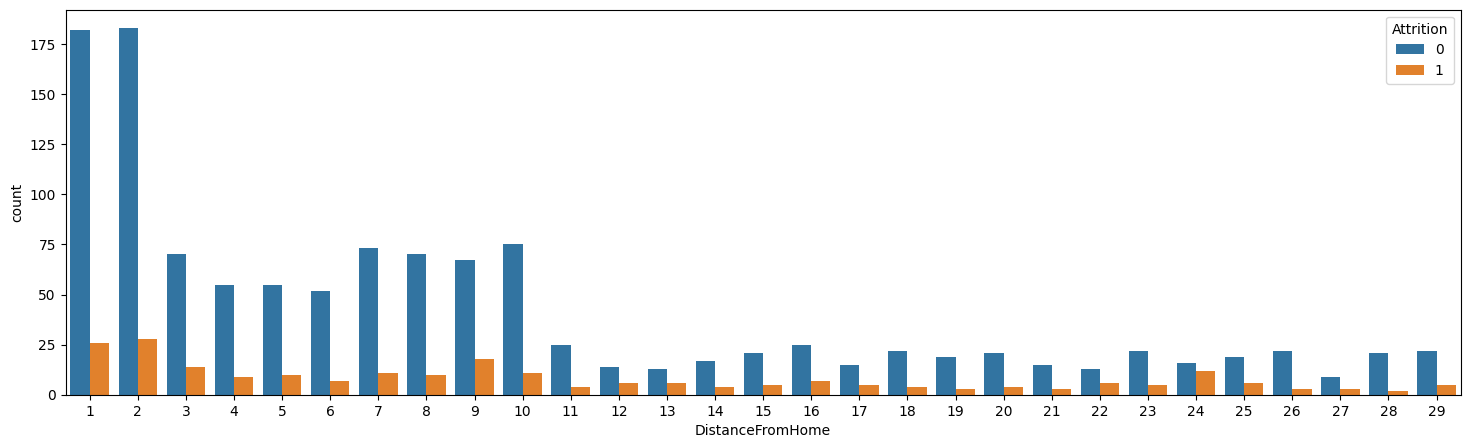

In [18]:
plt.figure(figsize=(18, 5))
sns.countplot(x = 'DistanceFromHome', hue = 'Attrition', data = funcionarios);

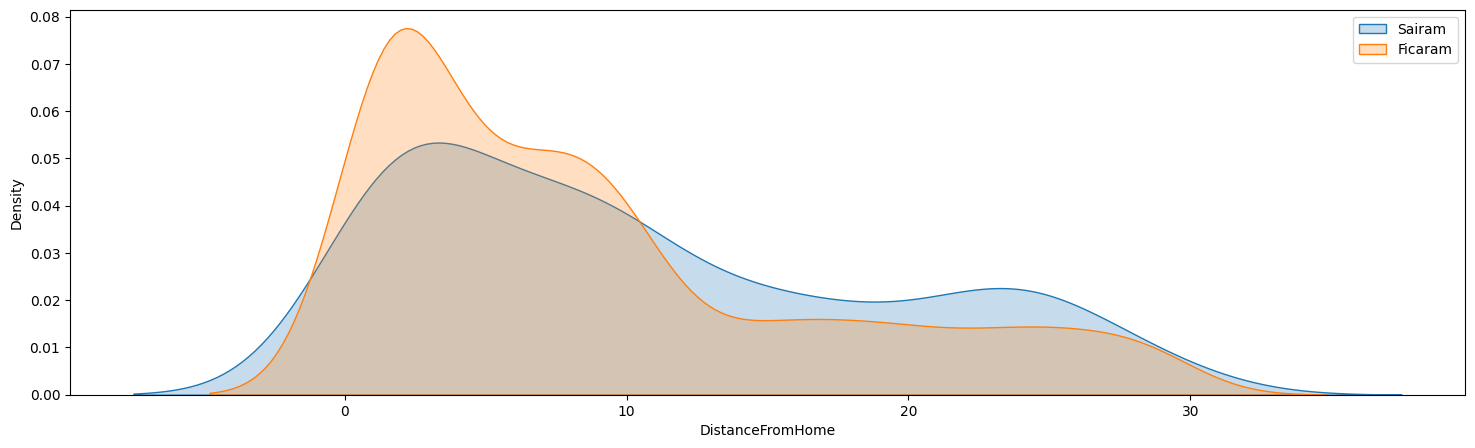

In [19]:
plt.figure(figsize=(18, 5))
sns.kdeplot(sairam['DistanceFromHome'], label = 'Sairam', fill = True);
sns.kdeplot(continuaram['DistanceFromHome'], label = 'Ficaram', fill = True);
plt.legend();

A empresa não costuma contratar muitas pessoas que moram mais distantes mas pessoas que moram mais distantes estão mais propensas a saírem da empresa

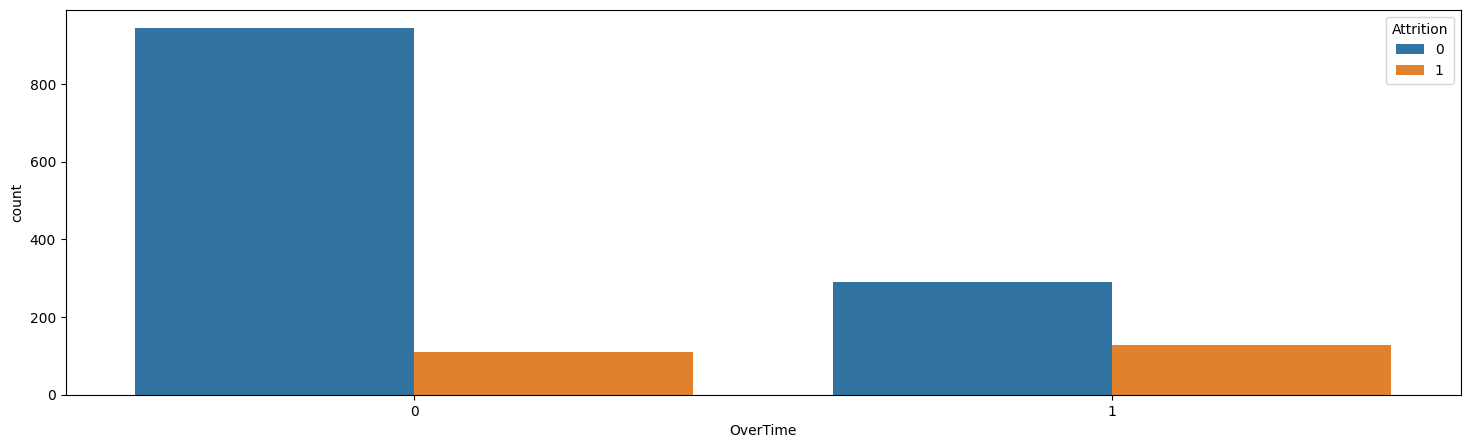

In [20]:
plt.figure(figsize=(18, 5))
sns.countplot(x = 'OverTime', hue = 'Attrition', data = funcionarios);

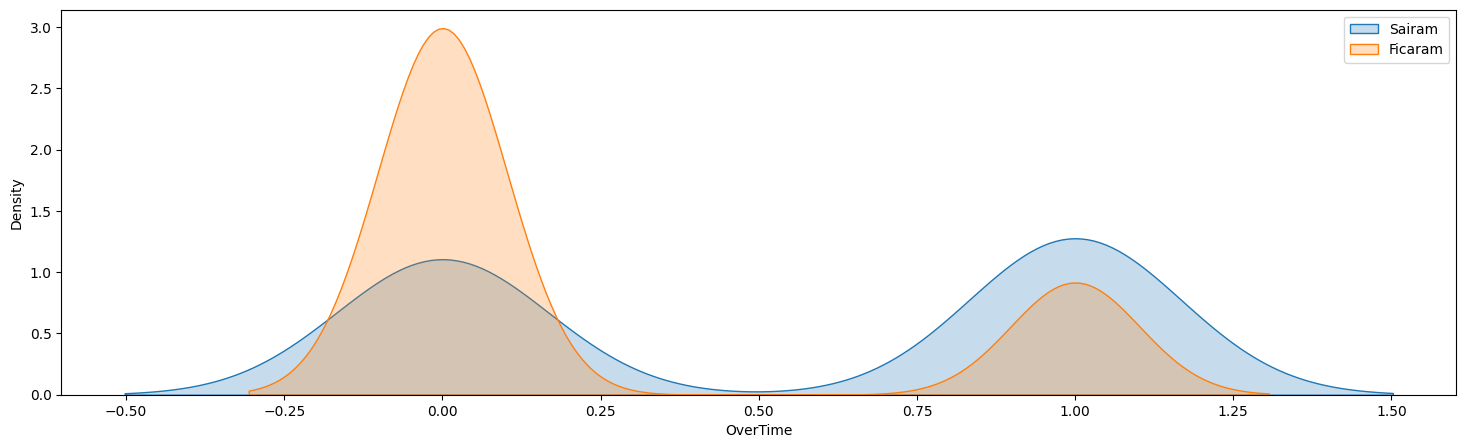

In [21]:
plt.figure(figsize=(18, 5))
sns.kdeplot(sairam['OverTime'], label = 'Sairam', fill = True);
sns.kdeplot(continuaram['OverTime'], label = 'Ficaram', fill = True);
plt.legend();

A proporção indica que pessoas que tem hora extra são mais propensas a sair

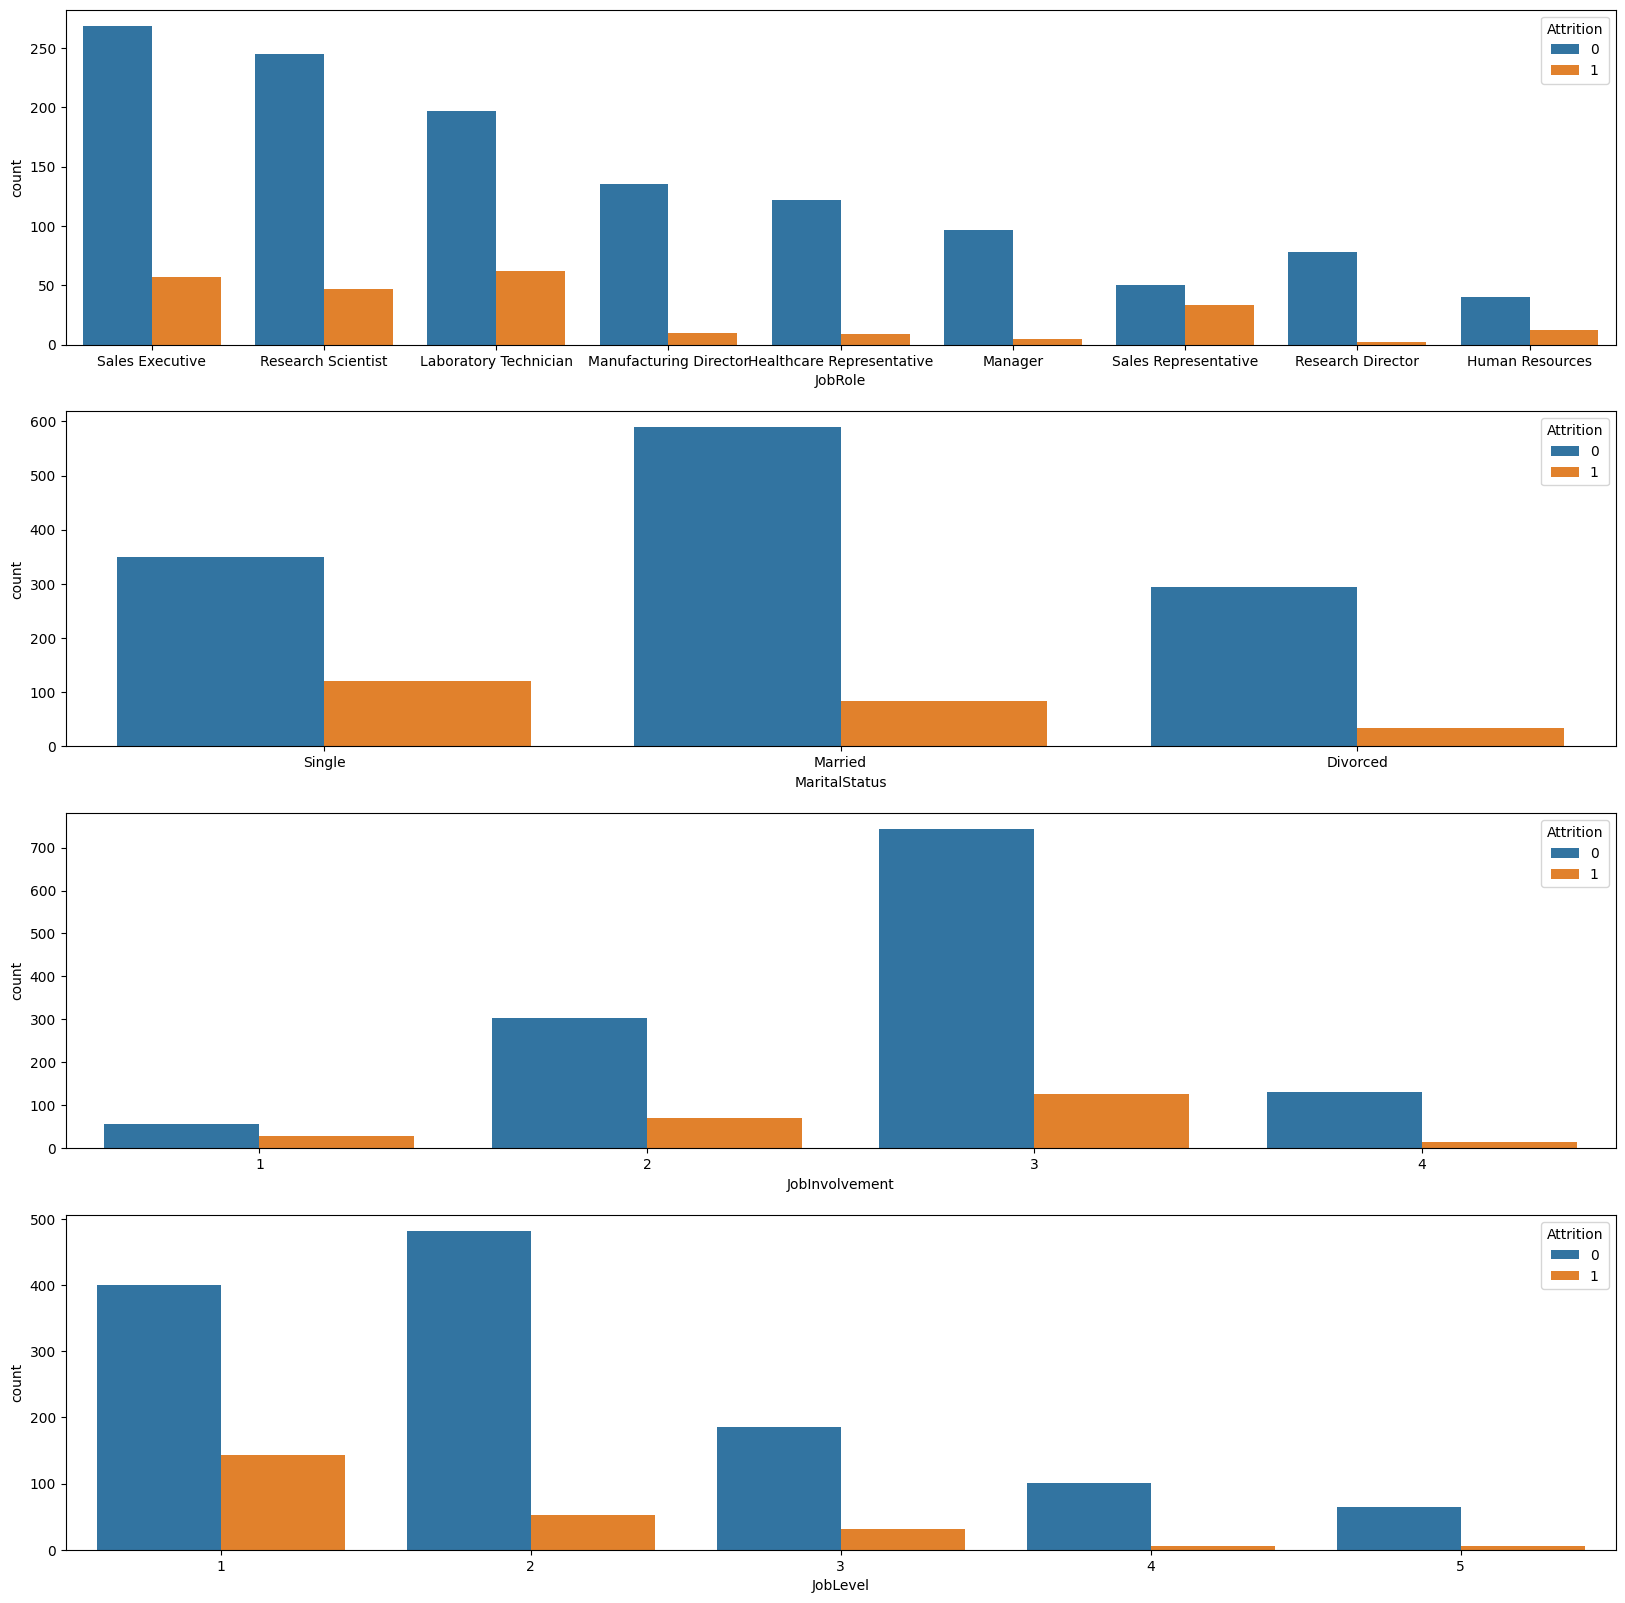

In [22]:
plt.figure(figsize=(20, 20))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = funcionarios);
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = funcionarios);
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = funcionarios);
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = funcionarios);

Pessoas solteiras, representantes de vendas e pessoas com cargo de nível menor têm maior tendência a sair da empresa (posso separar para fazer uma análise mais detalhada)

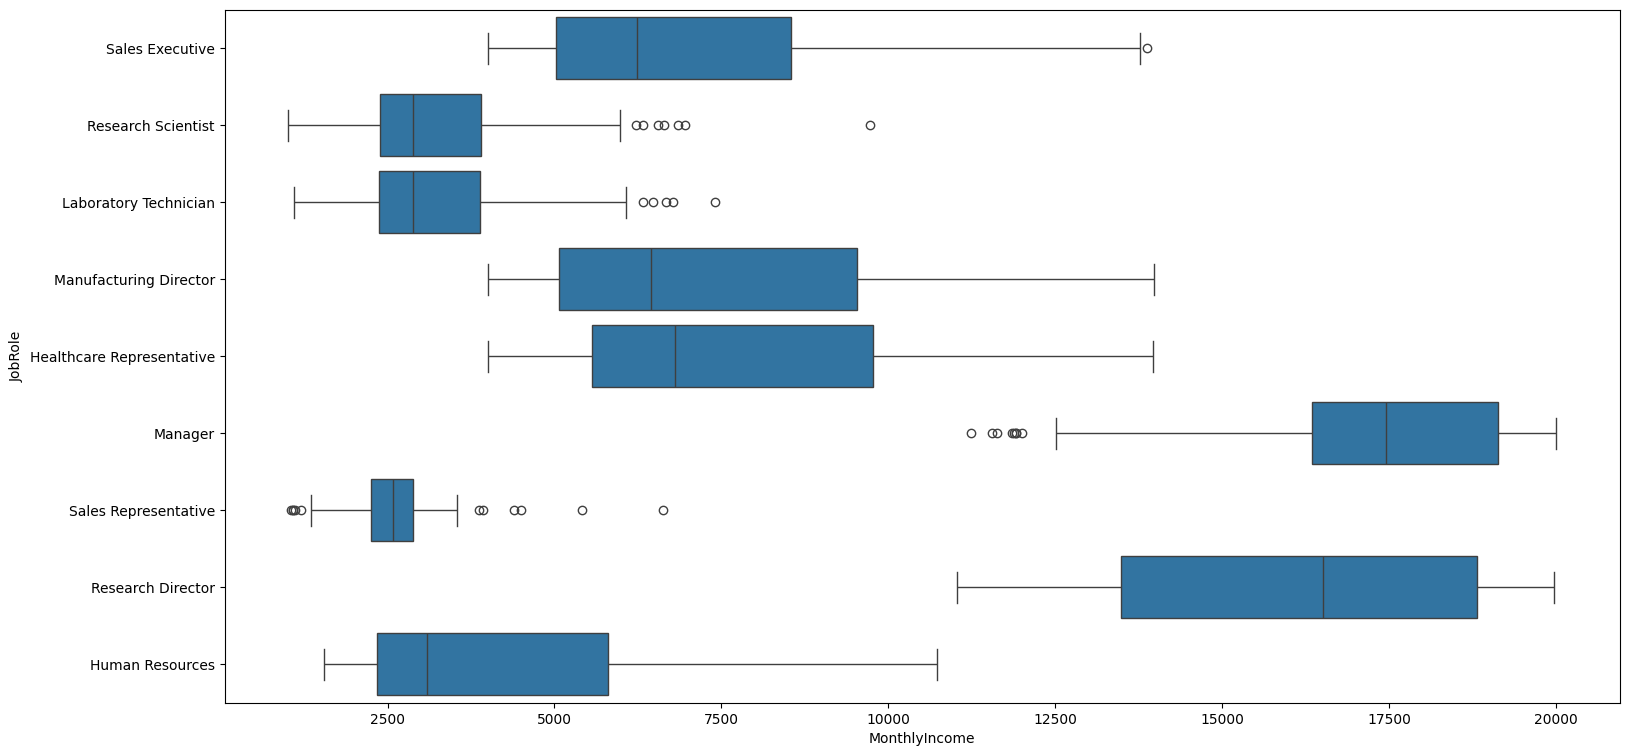

In [23]:
plt.figure(figsize=(18, 9))
sns.boxplot( x = 'MonthlyIncome', y = 'JobRole', data = funcionarios);

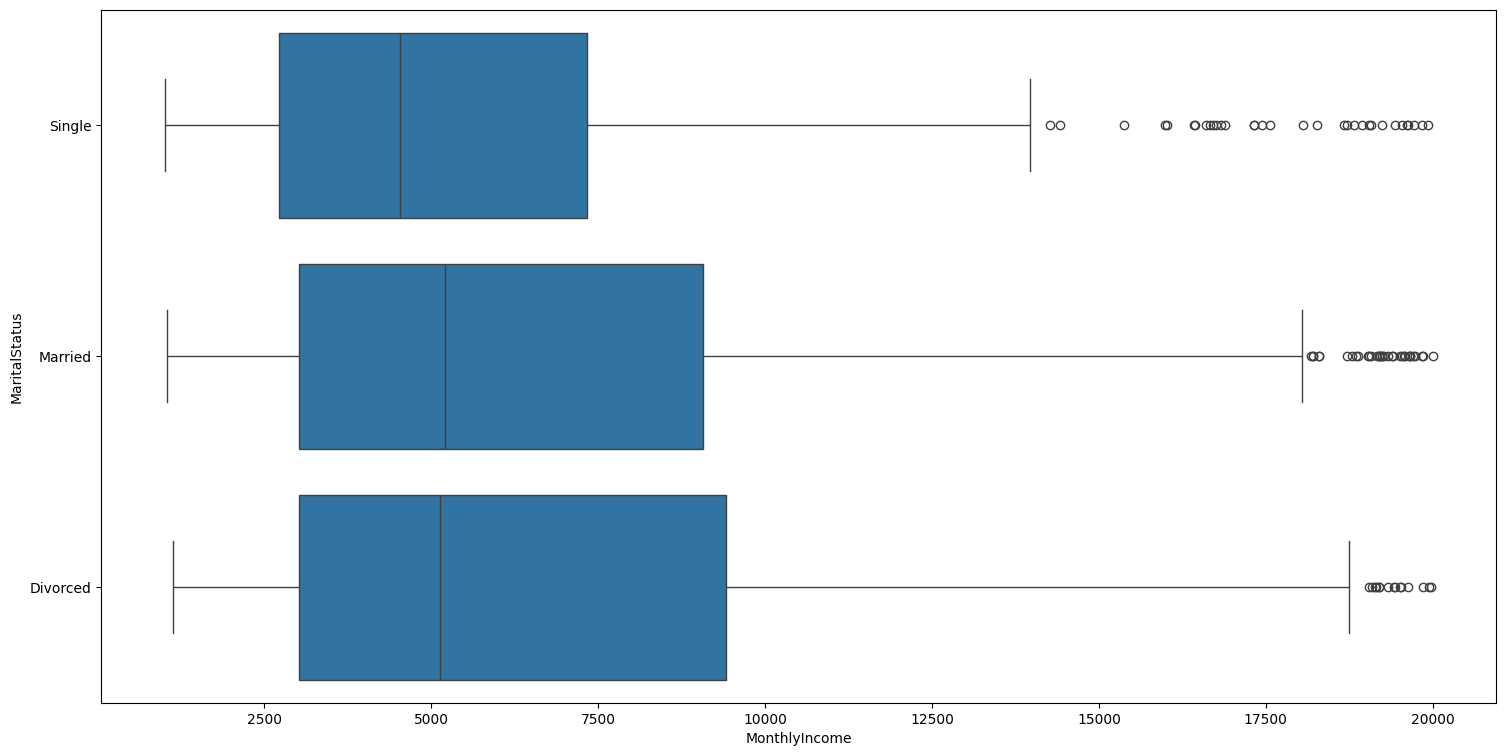

In [24]:
plt.figure(figsize=(18, 9))
sns.boxplot(x = 'MonthlyIncome', y = 'MaritalStatus', data = funcionarios);

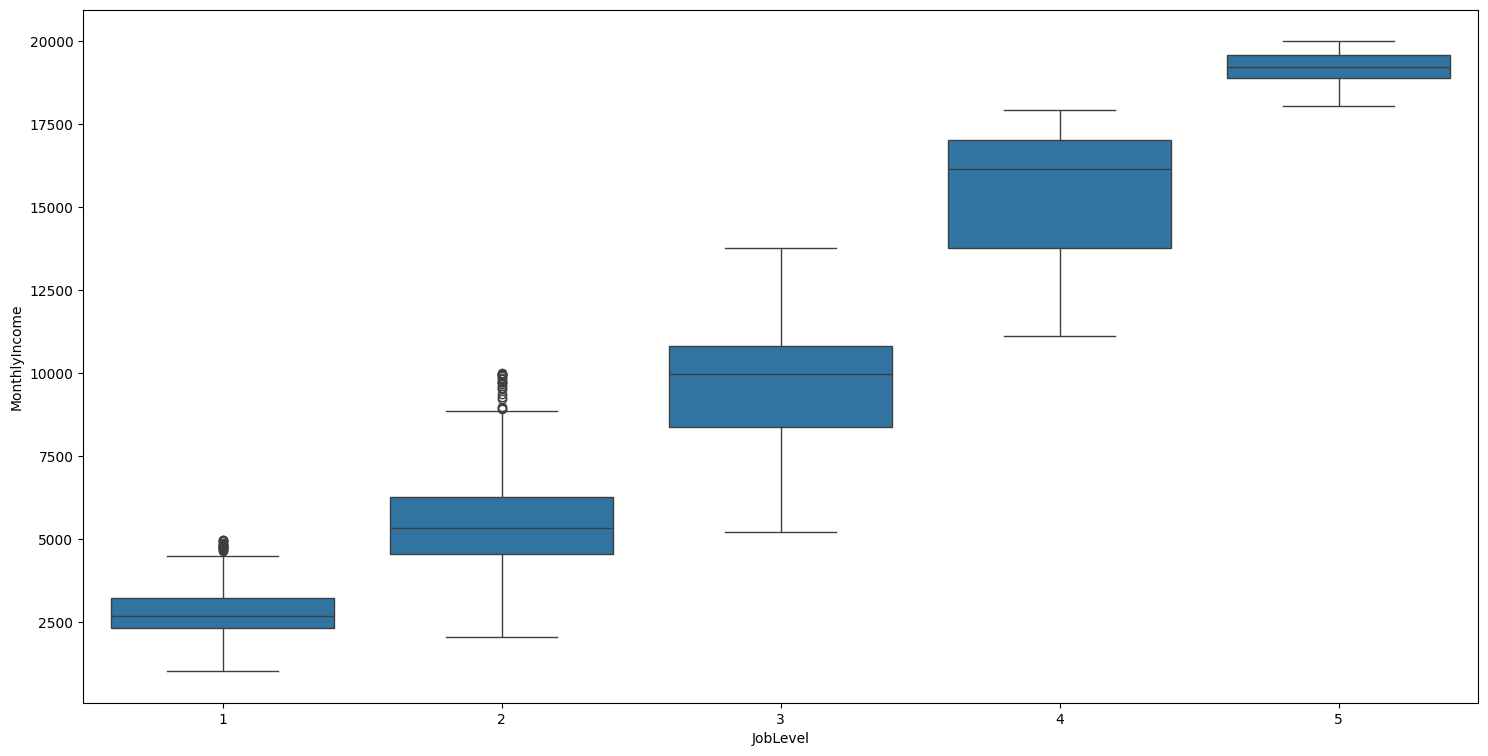

In [25]:
plt.figure(figsize=(18, 9))
sns.boxplot(y = 'MonthlyIncome', x = 'JobLevel', data = funcionarios);

Tudo isso pode ter haver com salário que eles recebem (Procurar outros fatores)

# Pré-processamento dos dados

In [26]:
categoricos = funcionarios.select_dtypes(exclude=np.number)
funcionarios.select_dtypes(exclude=np.number)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


A transformação será no estilo dummy, porque o modelo poderá se confundir ao achar que as datas representam algum tipo de ordem: 0 < 1 < 2 e atribuir um peso maior.

In [27]:
funcionarios.select_dtypes(include=np.number)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


Que não são problema para esses dados que já são numéricos e indicam ordem

In [28]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categoricos_encoded = onehotencoder.fit_transform(categoricos)
colunas_nomes = onehotencoder.get_feature_names_out(input_features=categoricos.columns)
categoricos = pd.DataFrame(categoricos_encoded, columns=colunas_nomes)

In [29]:
X = pd.concat([funcionarios.select_dtypes(include=np.number), categoricos], axis = 1).drop('Attrition', axis = 1)
y = funcionarios['Attrition']

In [30]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Normalizando para o modelo não considerar um atributo mais importante que o outro

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Implementação de modelos

Regressão Logística

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

modelo_regressao_logistica = LogisticRegression(random_state=42)
modelo_regressao_logistica.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
previsoes = modelo_regressao_logistica.predict(X_test)

**Como podemos avaliar os algoritmos?**

*Exemplo: Detecção de Spam em E-mails*

- True Positives (TP): O classificador previu que o e-mail é spam, e ele realmente é spam.

- True Negatives (TN): O classificador previu que o e-mail não é spam, e ele realmente não é spam.

- False Positives (FP) (Erro Tipo I): O classificador previu que o e-mail é spam, mas ele não é spam.

- False Negatives (FN) (Erro Tipo II): O classificador previu que o e-mail não é spam, mas ele é spam.


**Métricas de Desempenho:**
 - Accuracy: Mede a proporção de previsões corretas (TP + TN) em relação ao total de previsões.
  - Fórmula: $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

 - Precision: Mede a precisão das previsões positivas. Indica a proporção de verdadeiros positivos entre todas as previsões positivas.
  - Fórmula: $$ \text{Precision} = \frac{TP}{TP + FP} $$

 - Recall: Mede a capacidade do classificador de identificar todos os verdadeiros positivos. Indica a proporção de verdadeiros positivos entre todos os casos que realmente são positivos.
  - Fórmula: $$ \text{Recall} = \frac{TP}{TP + FN} $$

 - F1-Score: Combina a precisão (precision) e a sensibilidade (recall) em uma única medida. Ele é especialmente útil quando você tem um desequilíbrio entre as classes positivas e negativas.
  - Fórmula: $$ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

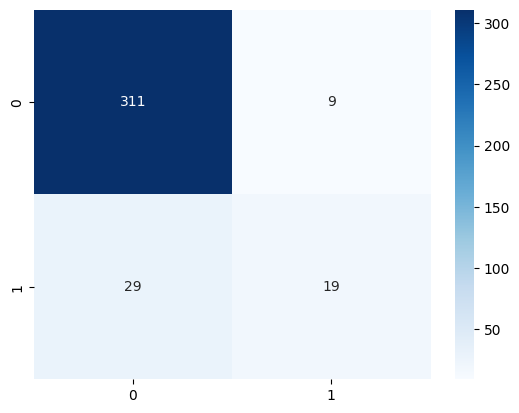

In [35]:
matriz_confusao = confusion_matrix(y_test, previsoes)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues');

- True Positives (TP): 311.

- True Negatives (TN): 19.

- False Positives (FP) (Erro Tipo I): 9.

- False Negatives (FN) (Erro Tipo II): 29.

In [36]:
classificacao = classification_report(y_test, previsoes)
print(classificacao)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



*Métricas por Classe*
- **Classe 0 (Não vai sair)**:
  - **Precision (Precisão)**: 0.91 - Quando o modelo previu que o funcionário não vai sair, ele estava correto 91% das vezes.
  - **Recall (Sensibilidade)**: 0.97 - O modelo identificou corretamente 97% dos funcionários que realmente não vão sair.
  - **F1-Score**: 0.94 - Combinação balanceada de precisão e recall para a classe 0.

- **Classe 1 (Vai sair)**:
  - **Precision (Precisão)**: 0.68 - Quando o modelo previu que o funcionário vai sair, ele estava correto 68% das vezes.
  - **Recall (Sensibilidade)**: 0.40 - O modelo identificou corretamente 40% dos funcionários que realmente vão sair.
  - **F1-Score**: 0.50 - Combinação balanceada de precisão e recall para a classe 1.

*Métricas Gerais*
- **Accuracy (Acurácia)**: 0.90 - O modelo estava correto em 90% das previsões totais.

**Interpretação Geral**
- O modelo tem uma excelente precisão e recall para a classe 0 (não vai sair), mas um desempenho significativamente menor para a classe 1 (vai sair). Isso pode indicar um desequilíbrio nas classes ou que o modelo precisa ser ajustado para melhorar a detecção da classe 1.
- A acurácia geral é alta (90%), mas a baixa sensibilidade (recall) para a classe 1 sugere que muitos casos de funcionários que vão sair estão sendo perdidos.

Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(random_state=42)
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
previsoes = modelo_random_forest.predict(X_test)

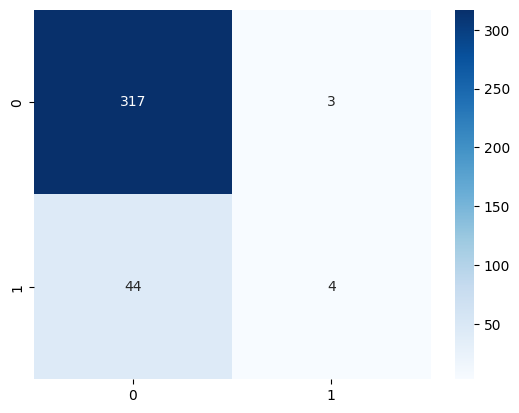

In [39]:
matriz_confusao = confusion_matrix(y_test, previsoes)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues');

- True Positives (TP): 317.

- True Negatives (TN): 4.

- False Positives (FP) (Erro Tipo I): 3.

- False Negatives (FN) (Erro Tipo II): 44.

In [40]:
classificacao = classification_report(y_test, previsoes)
print(classificacao)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368



*Métricas por Classe*
- **Classe 0 (Não vai sair)**:
  - **Precision (Precisão)**: 0.88 - Quando o modelo previu que o funcionário não vai sair, ele estava correto 88% das vezes.
  - **Recall (Sensibilidade)**: 0.99 - O modelo identificou corretamente 99% dos funcionários que realmente não vão sair.
  - **F1-Score**: 0.93 - Combinação balanceada de precisão e recall para a classe 0.

- **Classe 1 (Vai sair)**:
  - **Precision (Precisão)**: 0.57 - Quando o modelo previu que o funcionário vai sair, ele estava correto 57% das vezes.
  - **Recall (Sensibilidade)**: 0.08 - O modelo identificou corretamente 8% dos funcionários que realmente vão sair.
  - **F1-Score**:0.15 - Combinação balanceada de precisão e recall para a classe 1.

*Métricas Gerais*
- **Accuracy (Acurácia)**: 0.87 - O modelo estava correto em 87% das previsões totais.

**Interpretação Geral**
- O modelo tem uma excelente precisão e recall para a classe 0 (não vai sair), mas um desempenho significativamente menor para a classe 1 (vai sair). Isso pode indicar um desequilíbrio nas classes ou que o modelo precisa ser ajustado para melhorar a detecção da classe 1.
- A acurácia geral é alta (87%), mas a baixa sensibilidade (recall) para a classe 1 sugere que muitos casos de funcionários que vão sair estão sendo perdidos.


Rede Neural

- https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
X_train.shape

(1102, 50)

 - Para definir a quantidade de neurônios na entrada: ( Número de entradas (colunas) + número de saídas (1) ) / 2

In [43]:
# Sequencia de camadas
rede_neural = Sequential()

# Camada densa = quando o neurônio de uma camada está ligada a todos neurônios da próxima camada
rede_neural.add(Dense(units=25, activation='relu', input_shape=(50,)))
rede_neural.add(Dense(units=25, activation='relu'))
rede_neural.add(Dense(units=25, activation='relu'))
rede_neural.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
rede_neural.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
rede_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4697 - loss: 0.6913
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.4586
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4341
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4073
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3714
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8477 - loss: 0.3418
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3138
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3025 
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.3056 
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2844 
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8962 - loss: 0.2865 
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [47]:
previsoes = rede_neural.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [48]:
previsoes = ( previsoes >= 0.5 )

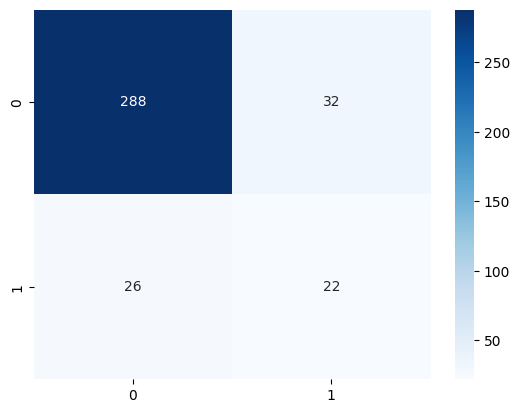

In [49]:
cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues');

- True Positives (TP): 294.

- True Negatives (TN): 23.

- False Positives (FP) (Erro Tipo I): 26.

- False Negatives (FN) (Erro Tipo II): 25.

In [50]:
classificacao = classification_report(y_test, previsoes)
print(classificacao)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       320
           1       0.41      0.46      0.43        48

    accuracy                           0.84       368
   macro avg       0.66      0.68      0.67       368
weighted avg       0.85      0.84      0.85       368



*Métricas por Classe*
- **Classe 0 (Não vai sair)**:
  - **Precision (Precisão)**: 0.92 - Quando o modelo previu que o funcionário não vai sair, ele estava correto 92% das vezes.
  - **Recall (Sensibilidade)**: 0.92 - O modelo identificou corretamente 92% dos funcionários que realmente não vão sair.
  - **F1-Score**: 0.92 - Combinação balanceada de precisão e recall para a classe 0.

- **Classe 1 (Vai sair)**:
  - **Precision (Precisão)**:0.47 - Quando o modelo previu que o funcionário vai sair, ele estava correto 47% das vezes.
  - **Recall (Sensibilidade)**: 0.48 - O modelo identificou corretamente 48% dos funcionários que realmente vão sair.
  - **F1-Score**: 0.47 - Combinação balanceada de precisão e recall para a classe 1.

*Métricas Gerais*
- **Accuracy (Acurácia)**: 0.86 - O modelo estava correto em 86% das previsões totais.

**Interpretação Geral**
- O modelo tem uma excelente precisão e recall para a classe 0 (não vai sair), mas um desempenho significativamente menor para a classe 1 (vai sair). Isso pode indicar um desequilíbrio nas classes ou que o modelo precisa ser ajustado para melhorar a detecção da classe 1.
- A acurácia geral é alta (86%), mas a baixa sensibilidade (recall) para a classe 1 sugere que muitos casos de funcionários que vão sair estão sendo perdidos.


# Conclusão
 - Usarei Regressão Logística por causa da interpretabilidade e a simplicidade, acho justo ser uma boa escolha inicial já que há possibilidade de melhorar o modelo com algumas técnicas.

# Salvando o classificador

In [51]:
import pickle

In [52]:
with open('modelo_classificacao_funcionarios', 'wb') as f:
  pickle.dump([scaler, onehotencoder, modelo_regressao_logistica], f)

In [53]:
with open('modelo_classificacao_funcionarios', 'rb') as f:
  scaler, onehotencoder, modelo_regressao_logistica = pickle.load(f)

In [54]:
scaler, onehotencoder, modelo_regressao_logistica

(MinMaxScaler(),
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 LogisticRegression(random_state=42))